# Classificaiton Models - Cross Validation Analysis
Este *notebook* tem como objetivo permitir uma rápida visualização de resultados dos experimentos de validação cruzada do tipo classificação binária. Aqui faremos uma análise *Out-Of-Fold*, isto é, utilizando-se predições de regiões dos dados não utilizadas no treinamento. Esse *notebook* se mostra importante pois permite-nos manter um histórico dos experimentos realizados. Basta exportarmos uma versão para PDF.

In [643]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from IPython.display import display
import os
import json
import sys, os
sys.path.insert(0,os.path.realpath('..'))
pd.options.display.max_columns = 50
import src.data_viz as dv


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Path para o diretório de resultados:

In [644]:
# Modelo de Risco de Crédito (Cross_Validation e Final_Validaiton)
#experiment_path = '../experiments/credit_risk/lgbm/cv_results'
#experiment_path = '../experiments/credit_risk/lgbm/final_validation'
# Modelo Identificação de Fraudes (Cross_Validation e Final_Validaiton)
#experiment_path = '../experiments/fraud_detection/lgbm/cv_results'
experiment_path = '../experiments/fraud_detection/lgbm/final_validation'

In [645]:
cv_results = pd.read_csv(os.path.join(experiment_path,'results.csv'))
oof_predictions = pd.read_csv(os.path.join(experiment_path,'oof_predictions.csv'))
feature_importances = pd.read_csv(os.path.join(experiment_path,'feature_importances.csv'))
conf = json.load(open(os.path.join(experiment_path,'experiment_conf.txt'),'r'))

### Experiment Config

In [646]:
display(conf)

{'actions': ['cross_validation'],
 'prediction_path': './new_data',
 'feat_engineering': [['zscore', 'ZScoreFeatureEngineering'],
  ['feat_eng', 'GeneralFeatureEngineering']],
 'pipeline_parameters': {'feat_union__cat_features__constrainer__min_occurrences': 1,
  'feat_union__cat_features__missing_strat__strategy': 'constant',
  'feat_union__num_features__missing_strat__strategy': 'constant'},
 'x_features': ['score_1',
  'score_2',
  'reason',
  'facebook_profile',
  'estimated_state',
  'estimated_district',
  'email',
  'job_name',
  'marketing_channel',
  'shipping_state',
  'shortned_user_agent',
  'profile_is_cellphone',
  'profile_phone_number_ddd',
  'estimated_state_shipping_state',
  'facebook_profile_state',
  'score_3',
  'score_4',
  'score_5',
  'score_6',
  'risk_rate',
  'last_amount_borrowed',
  'last_borrowed_in_months',
  'credit_limit',
  'income',
  'ok_since',
  'n_issues',
  'application_time_in_funnel',
  'external_data_provider_credit_checks_last_month',
  'ext

### Cross-Validation Performance

In [647]:
display(cv_results)

,acc,auc,fbeta
0,0.955556,0.714108,0.432258


### Out-of-Fold Analysis

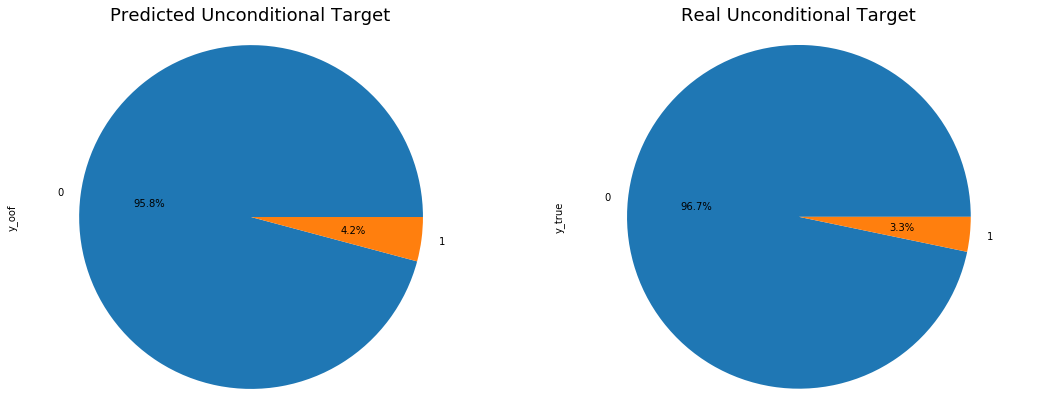

In [648]:
fig = plt.figure(figsize=(18,7))

oof_predictions['y_oof'] = oof_predictions['y_oof']

ax= fig.add_subplot(121)
(oof_predictions['y_oof'].value_counts()/oof_predictions.shape[0]).plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.axis('equal')
_ = ax.set_title('Predicted Unconditional Target', fontdict={'fontsize':18})
ax= fig.add_subplot(122)
(oof_predictions['y_true'].value_counts()/oof_predictions.shape[0]).plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.axis('equal')
_ = ax.set_title('Real Unconditional Target', fontdict={'fontsize':18})
plt.savefig('images/target_pie.png', dpi=300)

## Confusion Matrix

Confusion matrix, without normalization


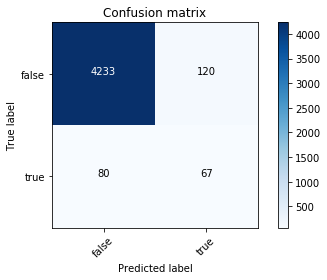

In [649]:
cnf_matrix = confusion_matrix(oof_predictions['y_true'],oof_predictions['y_oof'])
_=dv.plot_confusion_matrix(cnf_matrix,['false','true'])
plt.savefig('images/confusion_matrix.png', dpi=300)

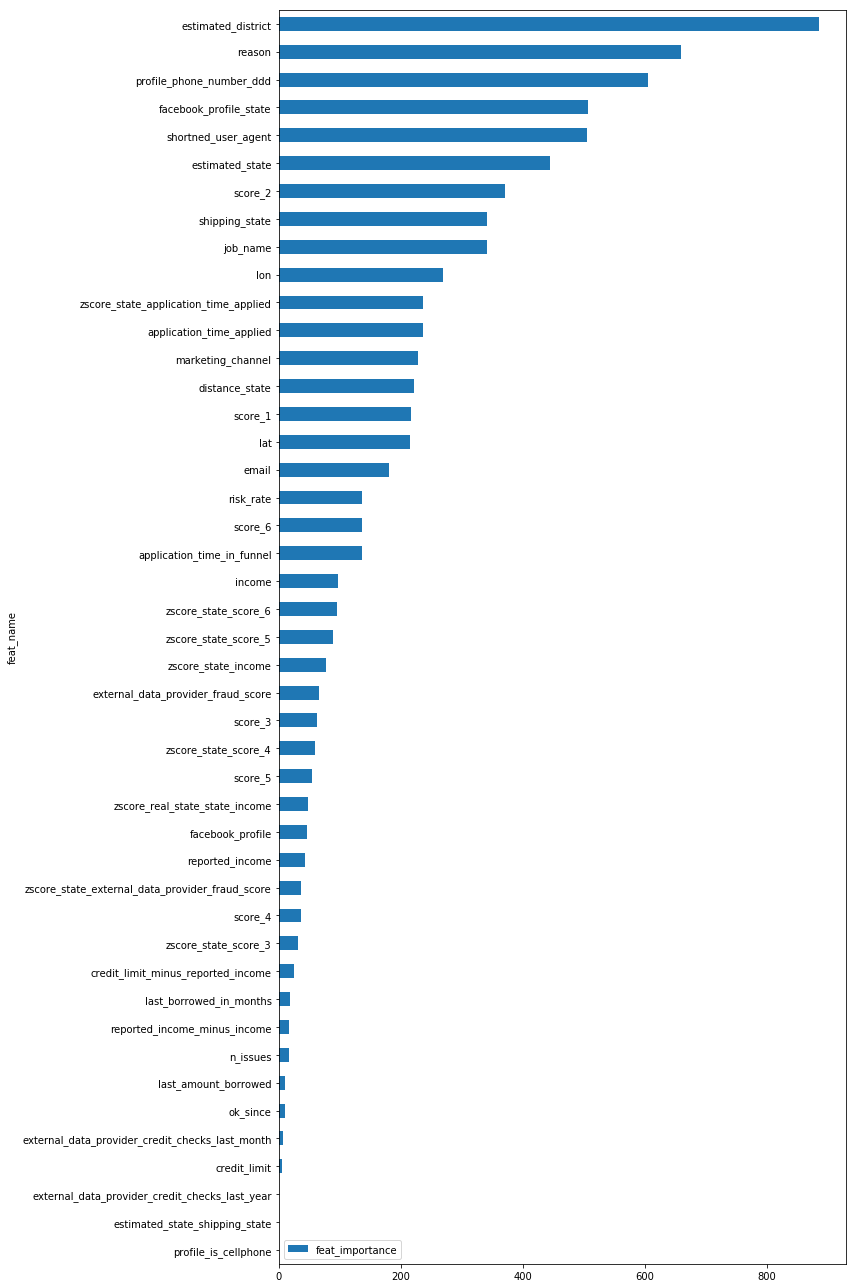

In [650]:
if feature_importances.shape[0]>0:
    fig = plt.figure(figsize=(12,18))
    ax = fig.add_subplot(111)
    _ = feature_importances.set_index('feat_name').sort_values('feat_importance').plot(kind='barh', ax=ax)
    fig.tight_layout()
    plt.savefig('images/importances.png', dpi=300)

## Resultados